# Image Histogram

# Grayscale Histogram

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def plt_imshow(title,image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.axis("off")
    plt.show()

In [41]:
image=cv2.imread("Images/beach.png")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

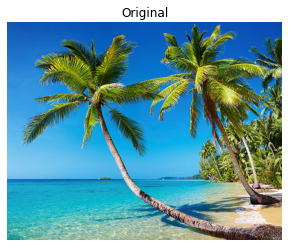

In [42]:
plt_imshow("Original",image)

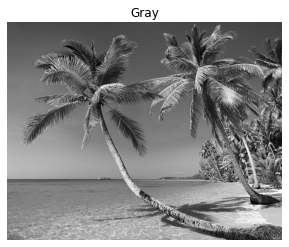

In [43]:
plt_imshow("Gray",gray)

In [49]:
hist=cv2.calcHist([gray],[0],None,[256],[0,256])
normalize_hist=hist/hist.sum()

(0.0, 256.0)

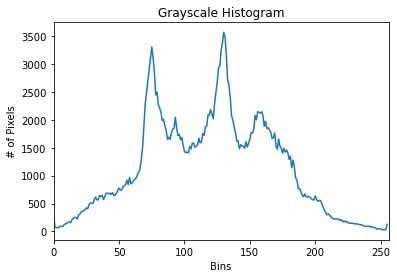

In [45]:
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0,256])


(0.0, 256.0)

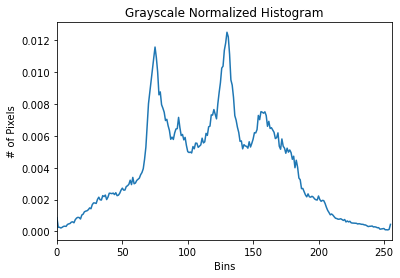

In [46]:
plt.figure()
plt.title("Grayscale Normalized Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(normalize_hist)
plt.xlim([0,256])

# Histogram

In [47]:
def plot_histogram(title,image,mask=None):
    chans=cv2.split(image)
    colors=("b","g","r")
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    
    for (chan,color) in zip(chans,colors):
        hist=cv2.calcHist([chan],[0],mask,[256],[0,256])
        plt.plot(hist,color=color)
        plt.xlim([0,256])
        
    
    

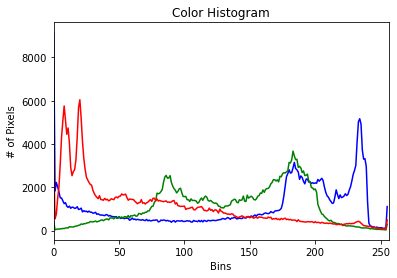

In [48]:
plot_histogram("Color Histogram",image)